In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.style.use('Solarize_Light2')
from astropy import units as u
import astropy.coordinates as coord
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs
import seaborn as sns
import hdbscan
import math
import itertools
import pickle


mpl.rcParams['figure.dpi'] = 150

In [2]:
#define some functions that i sometimes need
def healpix(sourceID, level):
    pixel = math.floor(sourceID /(2**35 * 4**(12-level)))
    return pixel

def parallax(mas):
    arcsec = mas/1000
    return 1/arcsec


parallax(1.1)

healpix(3094113406614578432, 5)

5496

In [3]:
# Load the data
coindata = pd.read_csv('Data\\COIN-result.csv')
plataisdata = pd.read_csv('Data\\Platais-result.csv')
UBC14data = pd.read_csv('Data\\UBC14-result.csv')
UBC13data = pd.read_csv('Data\\UBC13-result.csv')
UBC21data = pd.read_csv('Data\\UBC21-result.csv')
UPK495data = pd.read_csv('Data\\UPK_495-result.csv')
UPK533data = pd.read_csv('Data\\UPK533-result.csv')

#Special Case for UPK654, I will explain in the report
UPK654second = pd.read_csv('Data\\SecondUPK654-result.csv')
UPK654first = pd.read_csv('Data\\FirstUPK654-result.csv')

UPK654data = pd.concat([UPK654first, UPK654second])


#data for the crossmatch
members = pd.read_csv('Data\\members_kept_2681_OCs.csv')


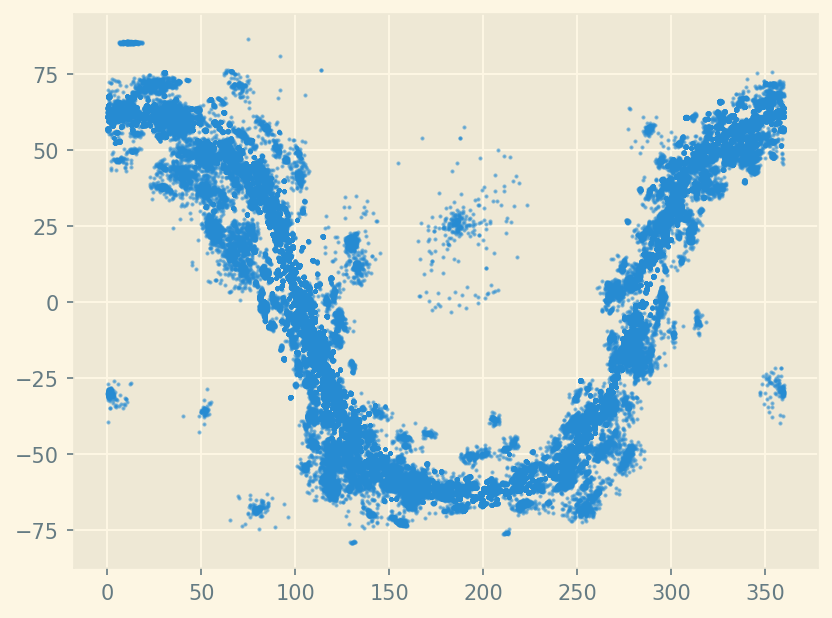

In [4]:
plt.scatter(members['ra'], members['dec'],marker= 'o', s=1, alpha=0.5)
plt.show()

clusters = members['cluster'].unique()


Now insert the functions that will be used to cluster the data


In [5]:



def HDBSCAN(data, minsize, magnitudecut):
    data = data[data['phot_g_mean_mag'] <= magnitudecut]
    data_needed = data[['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']].dropna()
    HDBprep = data_needed[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
    clusterer = hdbscan.HDBSCAN(min_cluster_size=minsize, cluster_selection_method='leaf', min_samples=10).fit(HDBprep)
    data_needed['clusternumber'] = clusterer.labels_
    clusteramount = clusterer.labels_.max() + 1
    print(f'HDBScan found {clusteramount} clusters at magnitudecut {magnitudecut}.')
    return data_needed, clusterer

Now we Run the clusterer and save it as to not spend an hour clustering each time, clusterer has been run so hashtag the code and instead import from the files.


In [6]:
#create dictionaries
UBC21_dictionary = {}
UBC21_cluster_dict = {}


UBC21members = members.query('cluster == "UBC_21"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC21members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UBC21members.query(f'phot_g_mean_mag<= {i}')))
#     UBC21_dictionary[f'UBC21_mag{i}_needed'], UBC21_cluster_dict[f'UBC21_mag{i}_clusterer'] = HDBSCAN(UBC21data, clustersize, i)


# #save the dictionaries as csv files 
# for key in UBC21_dictionary.keys():
#     UBC21_dictionary[key].to_csv(f'Data\\UBC21\\needed\\{key}.csv', index=False)
# for key in UBC21_cluster_dict.keys():
#     with open(f'Data\\UBC21\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UBC21_cluster_dict[key], f)


#way to load the clustering dictionaries, the csv files can be recovered the usual way

for i in magnitudecuts:
    with open(f'Data\\UBC21\\clusterer\\UBC21_mag{i}_clusterer.pkl', 'rb') as f:
        UBC21_cluster_dict[f'UBC21_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UBC21_dictionary[f'UBC21_mag{i}_needed'] = pd.read_csv(f'Data\\UBC21\\needed\\UBC21_mag{i}_needed.csv')

In [7]:
#create dictionaries
UBC13_dictionary = {}
UBC13_cluster_dict = {}
UBC13members = members.query('cluster == "UBC_13"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC13members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UBC13members.query(f'phot_g_mean_mag <= {i}')))
#     UBC13_dictionary[f'UBC13_mag{i}_needed'], UBC13_cluster_dict[f'UBC13_mag{i}_clusterer'] = HDBSCAN(UBC13data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UBC13_dictionary.keys():
#     UBC13_dictionary[key].to_csv(f'Data\\UBC13\\needed\\{key}.csv', index=False)
# for key in UBC13_cluster_dict.keys():
#     with open(f'Data\\UBC13\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UBC13_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UBC13\\clusterer\\UBC13_mag{i}_clusterer.pkl', 'rb') as f:
        UBC13_cluster_dict[f'UBC13_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UBC13_dictionary[f'UBC13_mag{i}_needed'] = pd.read_csv(f'Data\\UBC13\\needed\\UBC13_mag{i}_needed.csv')

In [8]:
#create dictionaries
UBC14_dictionary = {}
UBC14_cluster_dict = {}
UBC14members = members.query('cluster == "UBC_14"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC14members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UBC14members.query(f'phot_g_mean_mag <= {i}')))
#     UBC14_dictionary[f'UBC14_mag{i}_needed'], UBC14_cluster_dict[f'UBC14_mag{i}_clusterer'] = HDBSCAN(UBC14data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UBC14_dictionary.keys():
#     UBC14_dictionary[key].to_csv(f'Data\\UBC14\\needed\\{key}.csv', index=False)
# for key in UBC14_cluster_dict.keys():
#     with open(f'Data\\UBC14\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UBC14_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UBC14\\clusterer\\UBC14_mag{i}_clusterer.pkl', 'rb') as f:
        UBC14_cluster_dict[f'UBC14_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UBC14_dictionary[f'UBC14_mag{i}_needed'] = pd.read_csv(f'Data\\UBC14\\needed\\UBC14_mag{i}_needed.csv')

In [9]:
#create dictionaries
coin_dictionary = {}
coin_cluster_dict = {}
coinmembers = members.query('cluster == "COIN-Gaia_13"')
magnitudecuts = np.arange(12, (np.ceil(np.max(coinmembers['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(coinmembers.query(f'phot_g_mean_mag <= {i}')))
#     coin_dictionary[f'coin_mag{i}_needed'], coin_cluster_dict[f'coin_mag{i}_clusterer'] = HDBSCAN(coindata, clustersize, i)

# #save the dictionaries as csv files 
# for key in coin_dictionary.keys():
#     coin_dictionary[key].to_csv(f'Data\\COIN\\needed\\{key}.csv', index=False)
# for key in coin_cluster_dict.keys():
#     with open(f'Data\\COIN\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(coin_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\COIN\\clusterer\\coin_mag{i}_clusterer.pkl', 'rb') as f:
        coin_cluster_dict[f'coin_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    coin_dictionary[f'coin_mag{i}_needed'] = pd.read_csv(f'Data\\COIN\\needed\\coin_mag{i}_needed.csv')


In [10]:
#create dictionaries
platais_dictionary = {}
platais_cluster_dict = {}

plataismembers = members.query('cluster == "Platais_10"')
magnitudecuts = np.arange(12, (np.ceil(np.max(plataismembers['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(plataismembers.query(f'phot_g_mean_mag <= {i}')))
#     platais_dictionary[f'platais_mag{i}_needed'], platais_cluster_dict[f'platais_mag{i}_clusterer'] = HDBSCAN(plataisdata, clustersize, i)

# #save the dictionaries as csv files 
# for key in platais_dictionary.keys():
#     platais_dictionary[key].to_csv(f'Data\\Platais10\\needed\\{key}.csv', index=False)
# for key in platais_cluster_dict.keys():
#     with open(f'Data\\Platais10\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(platais_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\Platais10\\clusterer\\platais_mag{i}_clusterer.pkl', 'rb') as f:
        platais_cluster_dict[f'platais_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    platais_dictionary[f'platais_mag{i}_needed'] = pd.read_csv(f'Data\\Platais10\\needed\\platais_mag{i}_needed.csv')

In [11]:
#create dictionaries
UPK495_dictionary = {}
UPK495_cluster_dict = {}
UPK495members = members.query('cluster == "UPK_495"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK495members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UPK495members.query(f'phot_g_mean_mag <= {i}')))
#     UPK495_dictionary[f'UPK495_mag{i}_needed'], UPK495_cluster_dict[f'UPK495_mag{i}_clusterer'] = HDBSCAN(UPK495data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UPK495_dictionary.keys():
#     UPK495_dictionary[key].to_csv(f'Data\\UPK495\\needed\\{key}.csv', index=False)
# for key in UPK495_cluster_dict.keys():
#     with open(f'Data\\UPK495\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UPK495_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UPK495\\clusterer\\UPK495_mag{i}_clusterer.pkl', 'rb') as f:
        UPK495_cluster_dict[f'UPK495_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UPK495_dictionary[f'UPK495_mag{i}_needed'] = pd.read_csv(f'Data\\UPK495\\needed\\UPK495_mag{i}_needed.csv')

In [12]:
#create dictionaries
UPK533_dictionary = {}
UPK533_cluster_dict = {}
UPK533members = members.query('cluster == "UPK_533"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK533members['phot_g_mean_mag'])) + 1))


# for i in magnitudecuts:
#     clustersize = min(10, len(UPK533members.query(f'phot_g_mean_mag <= {i}')))
#     UPK533_dictionary[f'UPK533_mag{i}_needed'], UPK533_cluster_dict[f'UPK533_mag{i}_clusterer'] = HDBSCAN(UPK533data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UPK533_dictionary.keys():
#     UPK533_dictionary[key].to_csv(f'Data\\UPK533\\needed\\{key}.csv', index=False)
# for key in UPK533_cluster_dict.keys():
#     with open(f'Data\\UPK533\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UPK533_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UPK533\\clusterer\\UPK533_mag{i}_clusterer.pkl', 'rb') as f:
        UPK533_cluster_dict[f'UPK533_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UPK533_dictionary[f'UPK533_mag{i}_needed'] = pd.read_csv(f'Data\\UPK533\\needed\\UPK533_mag{i}_needed.csv')

In [13]:
# create dictionaries
UPK654_dictionary = {}
UPK654_cluster_dict = {}
UPK654members = members.query('cluster == "UPK_654"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK654members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UPK654members.query(f'phot_g_mean_mag <= {i}')))
#     UPK654_dictionary[f'UPK654_mag{i}_needed'], UPK654_cluster_dict[f'UPK654_mag{i}_clusterer'] = HDBSCAN(UPK654data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UPK654_dictionary.keys():
#     UPK654_dictionary[key].to_csv(f'Data\\UPK654\\needed\\{key}.csv', index=False)
# for key in UPK654_cluster_dict.keys():
#     with open(f'Data\\UPK654\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UPK654_cluster_dict[key], f)


for i in magnitudecuts:
    with open(f'Data\\UPK654\\clusterer\\UPK654_mag{i}_clusterer.pkl', 'rb') as f:
        UPK654_cluster_dict[f'UPK654_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UPK654_dictionary[f'UPK654_mag{i}_needed'] = pd.read_csv(f'Data\\UPK654\\needed\\UPK654_mag{i}_needed.csv')

Cluster algorithm as a function

In [14]:
def Clusteranalysis(data_needed, clusterer, literaturecluster, clustername, magnitudecut, minclustersize, savename):
    indices_to_keep = np.where(clusterer.labels_ != -1)[0] # find the indices of the clusters that are not noise
    isolatedclusters = data_needed.iloc[indices_to_keep] # change to the correct dataframe

    #plot the positions and proper motions of the clusters
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    #do the magnitude cut on the literaturecluster
    literaturecluster = literaturecluster[literaturecluster['phot_g_mean_mag'] <= magnitudecut]

    # First subplot
    axs[0].scatter(isolatedclusters['ra'], isolatedclusters['dec'], s=20, linewidth=0, c=clusterer.labels_[indices_to_keep])
    axs[0].scatter(literaturecluster['ra'], literaturecluster['dec'],marker= 'x', s=20, c='red', alpha=0.5, label='Literature cluster')
    axs[0].set_title(f'position of clusters trying to find {clustername}, \n with magnitude cut G = {magnitudecut}, min cluster size of {minclustersize}', fontsize = 10)
    axs[0].legend()
    axs[0].set_xlabel('RA')
    axs[0].set_ylabel('DEC')

    # Second subplot
    axs[1].scatter(isolatedclusters['pmra'], isolatedclusters['pmdec'], s=20, linewidth=0, c=clusterer.labels_[indices_to_keep])
    axs[1].scatter(literaturecluster['pmra'], literaturecluster['pmdec'],marker= 'x', s=20, c='red', alpha=0.5, label='Literature cluster')
    axs[1].set_title(f'Proper motion of clusters trying to find {clustername}, \n with magnitude cut G = {magnitudecut}, min cluster size of {minclustersize}', fontsize=10)
    axs[1].legend()
    axs[1].set_xlabel('pmra')
    axs[1].set_ylabel('pmdec')

    plt.tight_layout()
    plt.savefig(f'Data\\Plots\\{clustername}\\{savename}.pdf')
    plt.close()

    #find completeness and purity of the cluster
    merge = pd.merge(literaturecluster, isolatedclusters, left_on='source_id', right_on='source_id', how='inner') # merge the literature cluster with the clustered dataset on common source id to see which stars coincide
    print(f"The crossmatch finds {len(merge)} matches in cluster(s) {merge['clusternumber'].unique()}.")

    #plot the CMD and position of stars in the cluster matched with the dataset
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # First subplot
    axs[0].scatter(literaturecluster['bp_rp'], literaturecluster['phot_g_mean_mag'], s=20, c='red', alpha=0.5)
    axs[0].invert_yaxis()
    axs[0].set_title(f'{clustername} members')
    axs[0].set_xlabel('BP-RP')
    axs[0].set_ylabel('Gmag')

    # Second subplot
    if len(merge) > 0:
        axs[1].scatter(merge['ra_x'], merge['dec_x'], s=20, c='red', alpha=0.5)
        axs[1].set_title(f'{clustername} members in the cluster')
        axs[1].set_xlabel('RA')
        axs[1].set_ylabel('DEC')

    plt.tight_layout()
    plt.savefig(f'Data\\Plots\\{clustername}\\{savename}CMD.pdf')
    plt.close()


    if len(merge['clusternumber'].unique()) > 1:

        #if there are more than 1 clusters found, we first try to merge them by checking if they are compatible withing 2 sigma's of 3 astrometic parameters
        print(f'{clustername} has {len(literaturecluster)} members at magnitude cutoff {magnitudecut} and is assigned to multiple clusters, namely {merge["clusternumber"].unique()}.')

        completeness = len(merge) / len(literaturecluster) #completeness we can already calculate

        #These arrays store the amount of members that each group has and the amount of members that are crossmatched per group

        members_per_group = np.array([]) # array to store the amount of members crossmatched members per group
        membersarray = np.array([]) #array to store the amount of members that are in the groups that the cluster crossmatches to

        #we need to find the mean and standard deviation of 3 astrometric parameters for each cluster
        groups_needed = isolatedclusters[isolatedclusters['clusternumber'].isin(merge['clusternumber'].unique())] #take only the clusters that are crossmatched one way or the other with the literature cluster
        
        #we need to find the mean and standard deviation of all 5 astrometric parameters for each cluster
        clustermeans = groups_needed.groupby('clusternumber').mean()
        cluster_standard_deviation = groups_needed.groupby('clusternumber').std()

        #define what we have to group by
        groupby = ['parallax', 'pmra', 'pmdec']

        #leave only the columns in clustermeans and standard deviations that are in groupby
        clustermeans = clustermeans[groupby]
        cluster_standard_deviation = cluster_standard_deviation[groupby]

        #now take every possible combination of the clusters and check if they are compatible within 2 sigma
        for i in itertools.combinations(merge['clusternumber'].unique(), 2):
            cluster1 = i[0]
            cluster2 = i[1]

            compatibletest = np.abs(clustermeans.loc[cluster1] - clustermeans.loc[cluster2]) / np.sqrt(cluster_standard_deviation.loc[cluster1]**2 + cluster_standard_deviation.loc[cluster2]**2)

            if all(compatibletest < 2):
                print(f'Clusters {cluster1} and {cluster2} are compatible within 2 sigma.')
                print(compatibletest)

            else:
                print(f'Clusters {cluster1} and {cluster2} are not compatible within 2 sigma.')
                print(compatibletest)

        #as we merge all groups anyway regardless of compatibility, we can add all the members of the groups together and calculate the purity
        for i in merge['clusternumber'].unique():
            members_per_group = np.append(members_per_group,len(merge[merge["clusternumber"] == i]))
            membersarray = np.append(membersarray, len(isolatedclusters[isolatedclusters["clusternumber"] == i]))
        
        purity = np.sum(members_per_group) / np.sum(membersarray)

        return purity, completeness, len(merge)



    elif len(merge) == 0:
        print('There are no matches found.')
        candidates = 0
        purity = 0
        completeness = 0
        return purity, completeness, candidates
        
    else:
        unique_cluster = merge["clusternumber"].unique()[0]
        candidates = isolatedclusters.query(f'clusternumber == {unique_cluster}') # get all the stars in the clustered dataset that are in the same cluster as the literature cluster
        print(f'The cluster found using HDBSCAN has {len(candidates)} members. The literature cluster has {len(literaturecluster)} members.')

        purity = len(merge) / len(candidates)
        completeness = len(merge) / len(literaturecluster)
        print(f'for {clustername}, with a magnitude cut at {magnitudecut}, the purity is {purity} and the completeness is {completeness}')
    return purity, completeness, len(merge)

In [15]:
#create unique magnitude cuts for each cluster
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC21members['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
UBC21_purity_values = np.array([])
UBC21_completeness_values = np.array([])
UBC21_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UBC21_dictionary[f'UBC21_mag{i}_needed'], UBC21_cluster_dict[f'UBC21_mag{i}_clusterer'], UBC21members, 'UBC21', i, 10, f'UBC21_clusters_mag{i}')
    #store the purity, completeness, and amount of stars each group has in an array
    UBC21_purity_values = np.append(UBC21_purity_values, purity)
    UBC21_completeness_values = np.append(UBC21_completeness_values, completeness)
    UBC21_cluster_sizes = np.append(UBC21_cluster_sizes, HDBcluster_size)

The crossmatch finds 2 matches in cluster(s) [54].
The cluster found using HDBSCAN has 4 members. The literature cluster has 2 members.
for UBC21, with a magnitude cut at 12.0, the purity is 0.5 and the completeness is 1.0
The crossmatch finds 4 matches in cluster(s) [4].
The cluster found using HDBSCAN has 11 members. The literature cluster has 9 members.
for UBC21, with a magnitude cut at 13.0, the purity is 0.36363636363636365 and the completeness is 0.4444444444444444
The crossmatch finds 3 matches in cluster(s) [9].
The cluster found using HDBSCAN has 11 members. The literature cluster has 15 members.
for UBC21, with a magnitude cut at 14.0, the purity is 0.2727272727272727 and the completeness is 0.2
The crossmatch finds 11 matches in cluster(s) [22 19].
UBC21 has 29 members at magnitude cutoff 15.0 and is assigned to multiple clusters, namely [22 19].
Clusters 22 and 19 are compatible within 2 sigma.
parallax    0.467951
pmra        0.275675
pmdec       0.068692
dtype: float64
T

In [17]:
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC13members['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
UBC13_purity_values = np.array([])
UBC13_completeness_values = np.array([])
UBC13_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UBC13_dictionary[f'UBC13_mag{i}_needed'], UBC13_cluster_dict[f'UBC13_mag{i}_clusterer'], UBC13members, 'UBC13', i, 10, f'UBC13_clusters_mag{i}')
    UBC13_purity_values = np.append(UBC13_purity_values, purity)
    UBC13_completeness_values = np.append(UBC13_completeness_values, completeness)
    UBC13_cluster_sizes = np.append(UBC13_cluster_sizes, HDBcluster_size)

The crossmatch finds 3 matches in cluster(s) [2].
The cluster found using HDBSCAN has 12 members. The literature cluster has 11 members.
for UBC13, with a magnitude cut at 12.0, the purity is 0.25 and the completeness is 0.2727272727272727
The crossmatch finds 1 matches in cluster(s) [9].
The cluster found using HDBSCAN has 24 members. The literature cluster has 18 members.
for UBC13, with a magnitude cut at 13.0, the purity is 0.041666666666666664 and the completeness is 0.05555555555555555
The crossmatch finds 16 matches in cluster(s) [33 35 29].
UBC13 has 30 members at magnitude cutoff 14.0 and is assigned to multiple clusters, namely [33 35 29].
Clusters 33 and 35 are compatible within 2 sigma.
parallax    0.372890
pmra        0.274099
pmdec       1.124443
dtype: float64
Clusters 33 and 29 are compatible within 2 sigma.
parallax    0.195426
pmra        0.290299
pmdec       0.075718
dtype: float64
Clusters 35 and 29 are compatible within 2 sigma.
parallax    0.459077
pmra        0.4

In [18]:
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC14members['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
UBC14_purity_values = np.array([])
UBC14_completeness_values = np.array([])
UBC14_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UBC14_dictionary[f'UBC14_mag{i}_needed'], UBC14_cluster_dict[f'UBC14_mag{i}_clusterer'], UBC14members, 'UBC14', i, 10, f'UBC14_clusters_mag{i}')
    UBC14_purity_values = np.append(UBC14_purity_values, purity)
    UBC14_completeness_values = np.append(UBC14_completeness_values, completeness)
    UBC14_cluster_sizes = np.append(UBC14_cluster_sizes, HDBcluster_size)

The crossmatch finds 4 matches in cluster(s) [16].
The cluster found using HDBSCAN has 31 members. The literature cluster has 6 members.
for UBC14, with a magnitude cut at 12.0, the purity is 0.12903225806451613 and the completeness is 0.6666666666666666
The crossmatch finds 3 matches in cluster(s) [4].
The cluster found using HDBSCAN has 17 members. The literature cluster has 11 members.
for UBC14, with a magnitude cut at 13.0, the purity is 0.17647058823529413 and the completeness is 0.2727272727272727
The crossmatch finds 3 matches in cluster(s) [7].
The cluster found using HDBSCAN has 29 members. The literature cluster has 18 members.
for UBC14, with a magnitude cut at 14.0, the purity is 0.10344827586206896 and the completeness is 0.16666666666666666
The crossmatch finds 14 matches in cluster(s) [20 21].
UBC14 has 32 members at magnitude cutoff 15.0 and is assigned to multiple clusters, namely [20 21].
Clusters 20 and 21 are compatible within 2 sigma.
parallax    0.288322
pmra    

In [19]:
magnitudecuts = np.arange(12, (np.ceil(np.max(coinmembers['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
coin_purity_values = np.array([])
coin_completeness_values = np.array([])
coin_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(coin_dictionary[f'coin_mag{i}_needed'], coin_cluster_dict[f'coin_mag{i}_clusterer'], coinmembers, 'COIN-Gaia_13', i, 10, f'coin_clusters_mag{i}')
    coin_purity_values = np.append(coin_purity_values, purity)
    coin_completeness_values = np.append(coin_completeness_values, completeness)
    coin_cluster_sizes = np.append(coin_cluster_sizes, HDBcluster_size)

The crossmatch finds 21 matches in cluster(s) [4].
The cluster found using HDBSCAN has 27 members. The literature cluster has 44 members.
for COIN-Gaia_13, with a magnitude cut at 12.0, the purity is 0.7777777777777778 and the completeness is 0.4772727272727273
The crossmatch finds 34 matches in cluster(s) [6].
The cluster found using HDBSCAN has 42 members. The literature cluster has 66 members.
for COIN-Gaia_13, with a magnitude cut at 13.0, the purity is 0.8095238095238095 and the completeness is 0.5151515151515151
The crossmatch finds 55 matches in cluster(s) [17 18].
COIN-Gaia_13 has 108 members at magnitude cutoff 14.0 and is assigned to multiple clusters, namely [17 18].
Clusters 17 and 18 are compatible within 2 sigma.
parallax    0.261352
pmra        0.719368
pmdec       1.017004
dtype: float64
The crossmatch finds 94 matches in cluster(s) [24 23].
COIN-Gaia_13 has 157 members at magnitude cutoff 15.0 and is assigned to multiple clusters, namely [24 23].
Clusters 24 and 23 are

In [20]:
magnitudecuts = np.arange(12, (np.ceil(np.max(plataismembers['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
platais_purity_values = np.array([])
platais_completeness_values = np.array([])
platais_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(platais_dictionary[f'platais_mag{i}_needed'], platais_cluster_dict[f'platais_mag{i}_clusterer'], plataismembers, 'Platais10', i, 10, f'platais_clusters_mag{i}')
    platais_purity_values = np.append(platais_purity_values, purity)
    platais_completeness_values = np.append(platais_completeness_values, completeness)
    platais_cluster_sizes = np.append(platais_cluster_sizes, HDBcluster_size)

The crossmatch finds 12 matches in cluster(s) [1].
The cluster found using HDBSCAN has 20 members. The literature cluster has 13 members.
for Platais10, with a magnitude cut at 12.0, the purity is 0.6 and the completeness is 0.9230769230769231
The crossmatch finds 14 matches in cluster(s) [4].
The cluster found using HDBSCAN has 27 members. The literature cluster has 16 members.
for Platais10, with a magnitude cut at 13.0, the purity is 0.5185185185185185 and the completeness is 0.875
The crossmatch finds 18 matches in cluster(s) [5].
The cluster found using HDBSCAN has 26 members. The literature cluster has 20 members.
for Platais10, with a magnitude cut at 14.0, the purity is 0.6923076923076923 and the completeness is 0.9
The crossmatch finds 20 matches in cluster(s) [11].
The cluster found using HDBSCAN has 23 members. The literature cluster has 22 members.
for Platais10, with a magnitude cut at 15.0, the purity is 0.8695652173913043 and the completeness is 0.9090909090909091
The cr

In [21]:
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK495members['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
UPK495_purity_values = np.array([])
UPK495_completeness_values = np.array([])
UPK495_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UPK495_dictionary[f'UPK495_mag{i}_needed'], UPK495_cluster_dict[f'UPK495_mag{i}_clusterer'], UPK495members, 'UPK495', i, 10, f'UPK495_clusters_mag{i}')
    UPK495_purity_values = np.append(UPK495_purity_values, purity)
    UPK495_completeness_values = np.append(UPK495_completeness_values, completeness)
    UPK495_cluster_sizes = np.append(UPK495_cluster_sizes, HDBcluster_size)

The crossmatch finds 8 matches in cluster(s) [4].
The cluster found using HDBSCAN has 27 members. The literature cluster has 11 members.
for UPK495, with a magnitude cut at 12.0, the purity is 0.2962962962962963 and the completeness is 0.7272727272727273
The crossmatch finds 10 matches in cluster(s) [8].
The cluster found using HDBSCAN has 19 members. The literature cluster has 14 members.
for UPK495, with a magnitude cut at 13.0, the purity is 0.5263157894736842 and the completeness is 0.7142857142857143
The crossmatch finds 12 matches in cluster(s) [8].
The cluster found using HDBSCAN has 50 members. The literature cluster has 18 members.
for UPK495, with a magnitude cut at 14.0, the purity is 0.24 and the completeness is 0.6666666666666666
The crossmatch finds 10 matches in cluster(s) [34].
The cluster found using HDBSCAN has 14 members. The literature cluster has 21 members.
for UPK495, with a magnitude cut at 15.0, the purity is 0.7142857142857143 and the completeness is 0.4761904

In [22]:
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK533members['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
UPK533_purity_values = np.array([])
UPK533_completeness_values = np.array([])
UPK533_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UPK533_dictionary[f'UPK533_mag{i}_needed'], UPK533_cluster_dict[f'UPK533_mag{i}_clusterer'], UPK533members, 'UPK533', i, 10, f'UPK533_clusters_mag{i}')
    UPK533_purity_values = np.append(UPK533_purity_values, purity)
    UPK533_completeness_values = np.append(UPK533_completeness_values, completeness)
    UPK533_cluster_sizes = np.append(UPK533_cluster_sizes, HDBcluster_size)

The crossmatch finds 0 matches in cluster(s) [].
There are no matches found.
The crossmatch finds 0 matches in cluster(s) [].
There are no matches found.
The crossmatch finds 8 matches in cluster(s) [9].
The cluster found using HDBSCAN has 11 members. The literature cluster has 28 members.
for UPK533, with a magnitude cut at 14.0, the purity is 0.7272727272727273 and the completeness is 0.2857142857142857
The crossmatch finds 9 matches in cluster(s) [11 14].
UPK533 has 34 members at magnitude cutoff 15.0 and is assigned to multiple clusters, namely [11 14].
Clusters 11 and 14 are not compatible within 2 sigma.
parallax    0.249364
pmra        2.809697
pmdec       0.802537
dtype: float64
The crossmatch finds 15 matches in cluster(s) [24 28].
UPK533 has 47 members at magnitude cutoff 16.0 and is assigned to multiple clusters, namely [24 28].
Clusters 24 and 28 are not compatible within 2 sigma.
parallax    0.365938
pmra        2.882805
pmdec       0.854331
dtype: float64
The crossmatch f

In [23]:
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK654members['phot_g_mean_mag'])) + 1))

#create a loop over the dictionaries to do the cluster analysis
UPK654_purity_values = np.array([])
UPK654_completeness_values = np.array([])
UPK654_cluster_sizes = np.array([])

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UPK654_dictionary[f'UPK654_mag{i}_needed'], UPK654_cluster_dict[f'UPK654_mag{i}_clusterer'], UPK654members, 'UPK654', i, 10, f'UPK654_clusters_mag{i}')
    UPK654_purity_values = np.append(UPK654_purity_values, purity)
    UPK654_completeness_values = np.append(UPK654_completeness_values, completeness)
    UPK654_cluster_sizes = np.append(UPK654_cluster_sizes, HDBcluster_size)

The crossmatch finds 0 matches in cluster(s) [].
There are no matches found.
The crossmatch finds 11 matches in cluster(s) [4].
The cluster found using HDBSCAN has 17 members. The literature cluster has 20 members.
for UPK654, with a magnitude cut at 13.0, the purity is 0.6470588235294118 and the completeness is 0.55
The crossmatch finds 15 matches in cluster(s) [14].
The cluster found using HDBSCAN has 22 members. The literature cluster has 31 members.
for UPK654, with a magnitude cut at 14.0, the purity is 0.6818181818181818 and the completeness is 0.4838709677419355
The crossmatch finds 19 matches in cluster(s) [44].
The cluster found using HDBSCAN has 22 members. The literature cluster has 42 members.
for UPK654, with a magnitude cut at 15.0, the purity is 0.8636363636363636 and the completeness is 0.4523809523809524
The crossmatch finds 26 matches in cluster(s) [74].
The cluster found using HDBSCAN has 30 members. The literature cluster has 56 members.
for UPK654, with a magnitude

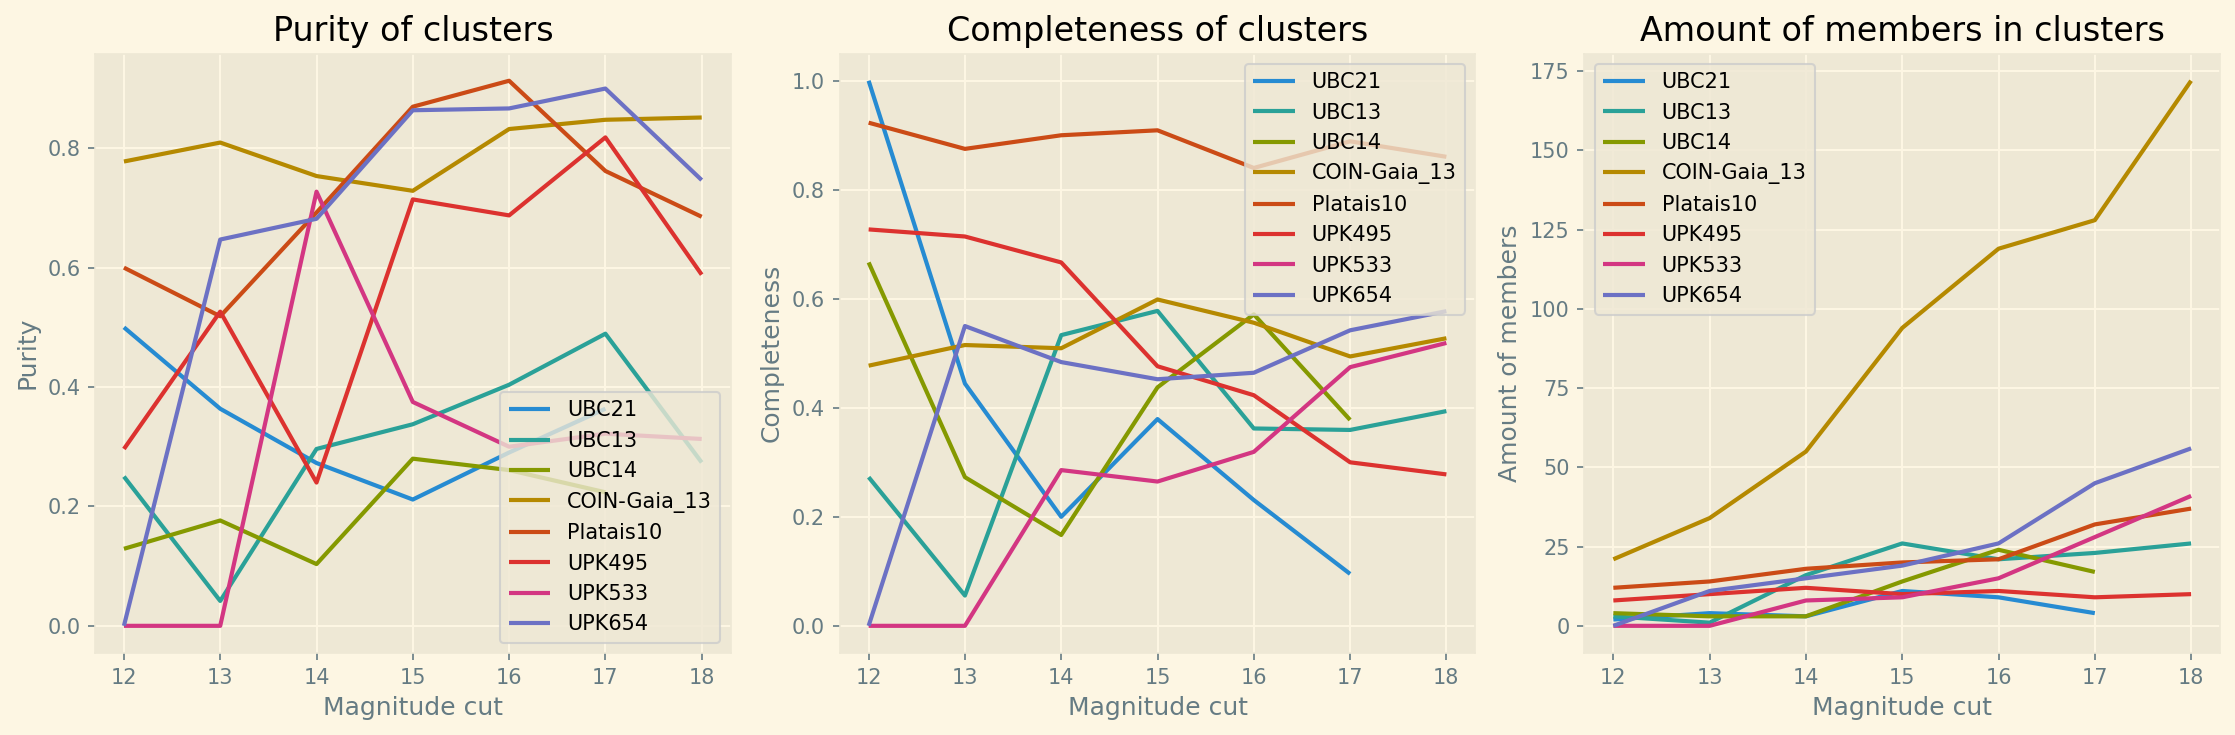

In [28]:

#create all the magnitude cuts for the clusters
magnitudecutsUBC21 = np.arange(12, (np.ceil(np.max(UBC21members['phot_g_mean_mag'])) + 1))
magnitudecutsUBC13 = np.arange(12, (np.ceil(np.max(UBC13members['phot_g_mean_mag'])) + 1))
magnitudecutsUBC14 = np.arange(12, (np.ceil(np.max(UBC14members['phot_g_mean_mag'])) + 1))
magnitudecutsCOIN = np.arange(12, (np.ceil(np.max(coinmembers['phot_g_mean_mag'])) + 1))
magnitudecutsPlatais = np.arange(12, (np.ceil(np.max(plataismembers['phot_g_mean_mag'])) + 1))
magnitudecutsUPK495 = np.arange(12, (np.ceil(np.max(UPK495members['phot_g_mean_mag'])) + 1))
magnitudecutsUPK533 = np.arange(12, (np.ceil(np.max(UPK533members['phot_g_mean_mag'])) + 1))
magnitudecutsUPK654 = np.arange(12, (np.ceil(np.max(UPK654members['phot_g_mean_mag'])) + 1))


#plot the purity, completeness and amount of members in the clusters

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(magnitudecutsUBC21, UBC21_purity_values, label='UBC21')
axs[0].plot(magnitudecutsUBC13, UBC13_purity_values, label='UBC13')
axs[0].plot(magnitudecutsUBC14, UBC14_purity_values, label='UBC14')
axs[0].plot(magnitudecutsCOIN, coin_purity_values, label='COIN-Gaia_13')
axs[0].plot(magnitudecutsPlatais, platais_purity_values, label='Platais10')
axs[0].plot(magnitudecutsUPK495, UPK495_purity_values, label='UPK495')
axs[0].plot(magnitudecutsUPK533, UPK533_purity_values, label='UPK533')
axs[0].plot(magnitudecutsUPK654, UPK654_purity_values, label='UPK654')
axs[0].set_xlabel('Magnitude cut')
axs[0].set_ylabel('Purity')
axs[0].set_title('Purity of clusters')
axs[0].legend()

axs[1].plot(magnitudecutsUBC21, UBC21_completeness_values, label='UBC21')
axs[1].plot(magnitudecutsUBC13, UBC13_completeness_values, label='UBC13')
axs[1].plot(magnitudecutsUBC14, UBC14_completeness_values, label='UBC14')
axs[1].plot(magnitudecutsCOIN, coin_completeness_values, label='COIN-Gaia_13')
axs[1].plot(magnitudecutsPlatais, platais_completeness_values, label='Platais10')
axs[1].plot(magnitudecutsUPK495, UPK495_completeness_values, label='UPK495')
axs[1].plot(magnitudecutsUPK533, UPK533_completeness_values, label='UPK533')
axs[1].plot(magnitudecutsUPK654, UPK654_completeness_values, label='UPK654')
axs[1].set_xlabel('Magnitude cut')
axs[1].set_ylabel('Completeness')
axs[1].set_title('Completeness of clusters')
axs[1].legend()

axs[2].plot(magnitudecutsUBC21, UBC21_cluster_sizes, label='UBC21')
axs[2].plot(magnitudecutsUBC13, UBC13_cluster_sizes, label='UBC13')
axs[2].plot(magnitudecutsUBC14, UBC14_cluster_sizes, label='UBC14')
axs[2].plot(magnitudecutsCOIN, coin_cluster_sizes, label='COIN-Gaia_13')
axs[2].plot(magnitudecutsPlatais, platais_cluster_sizes, label='Platais10')
axs[2].plot(magnitudecutsUPK495, UPK495_cluster_sizes, label='UPK495')
axs[2].plot(magnitudecutsUPK533, UPK533_cluster_sizes, label='UPK533')
axs[2].plot(magnitudecutsUPK654, UPK654_cluster_sizes, label='UPK654')
axs[2].set_xlabel('Magnitude cut')
axs[2].set_ylabel('Amount of members')
axs[2].set_title('Amount of members in clusters')
axs[2].legend()

plt.tight_layout()
plt.savefig('Data\\Plots\\PurityCompleteness.pdf')
plt.show()

